# Import Packages

In [ ]:
 pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

# Import Dataset

In [ ]:
my_data = pd.read_csv('feature-of-my-tez.csv')
my_data.info()
my_data.head()
# BPD = 0 &  BD = 1

# Target = ['Group']
# print(Target)
my_data.info()
my_data.head()

In [ ]:
data = my_data
df= my_data
X = df.drop('Group', axis=1)
X[0:5]

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}

X['Sex'] = X['Sex'].map(gender_mapping)
X[0:5]

In [ ]:
# from sklearn import preprocessing

# x = X.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()

# x_scaled = min_max_scaler.fit_transform(x)
# EDA = pd.DataFrame(x_scaled)
# # EDA=EDA.replace(1,0.5)
# EDA[0:5]
# data_frame = pd.DataFrame(data, columns=['Sex', 'P3 P_Beta', 'P3 We_All_Ch1', 'FZ Rwe_All_Ch2', 'F4 Rwe_All_Ch2', 'C4 Rwe_All_Ch3', 'M1 Rwe_All_Ch4', 'T3 Rwe_All_Ch4', 'C3 Rwe_All_Ch4', 'Cz Rwe_All_Ch4', 'C3 Rwe_All_Ch5'])

In [ ]:
y = data[['Group']]
y [0:5]

# Modeling

In [7]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd


fvalue_Best = SelectKBest(score_func=f_classif, k=11)
X_kbest = fvalue_Best.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = fvalue_Best.get_support()

# Get the original feature names
selected_feature_names = X.columns[selected_feature_indices]

# Create a DataFrame with the selected features and their names
dp = pd.DataFrame(X_kbest, columns=selected_feature_names)

SelectKBest()


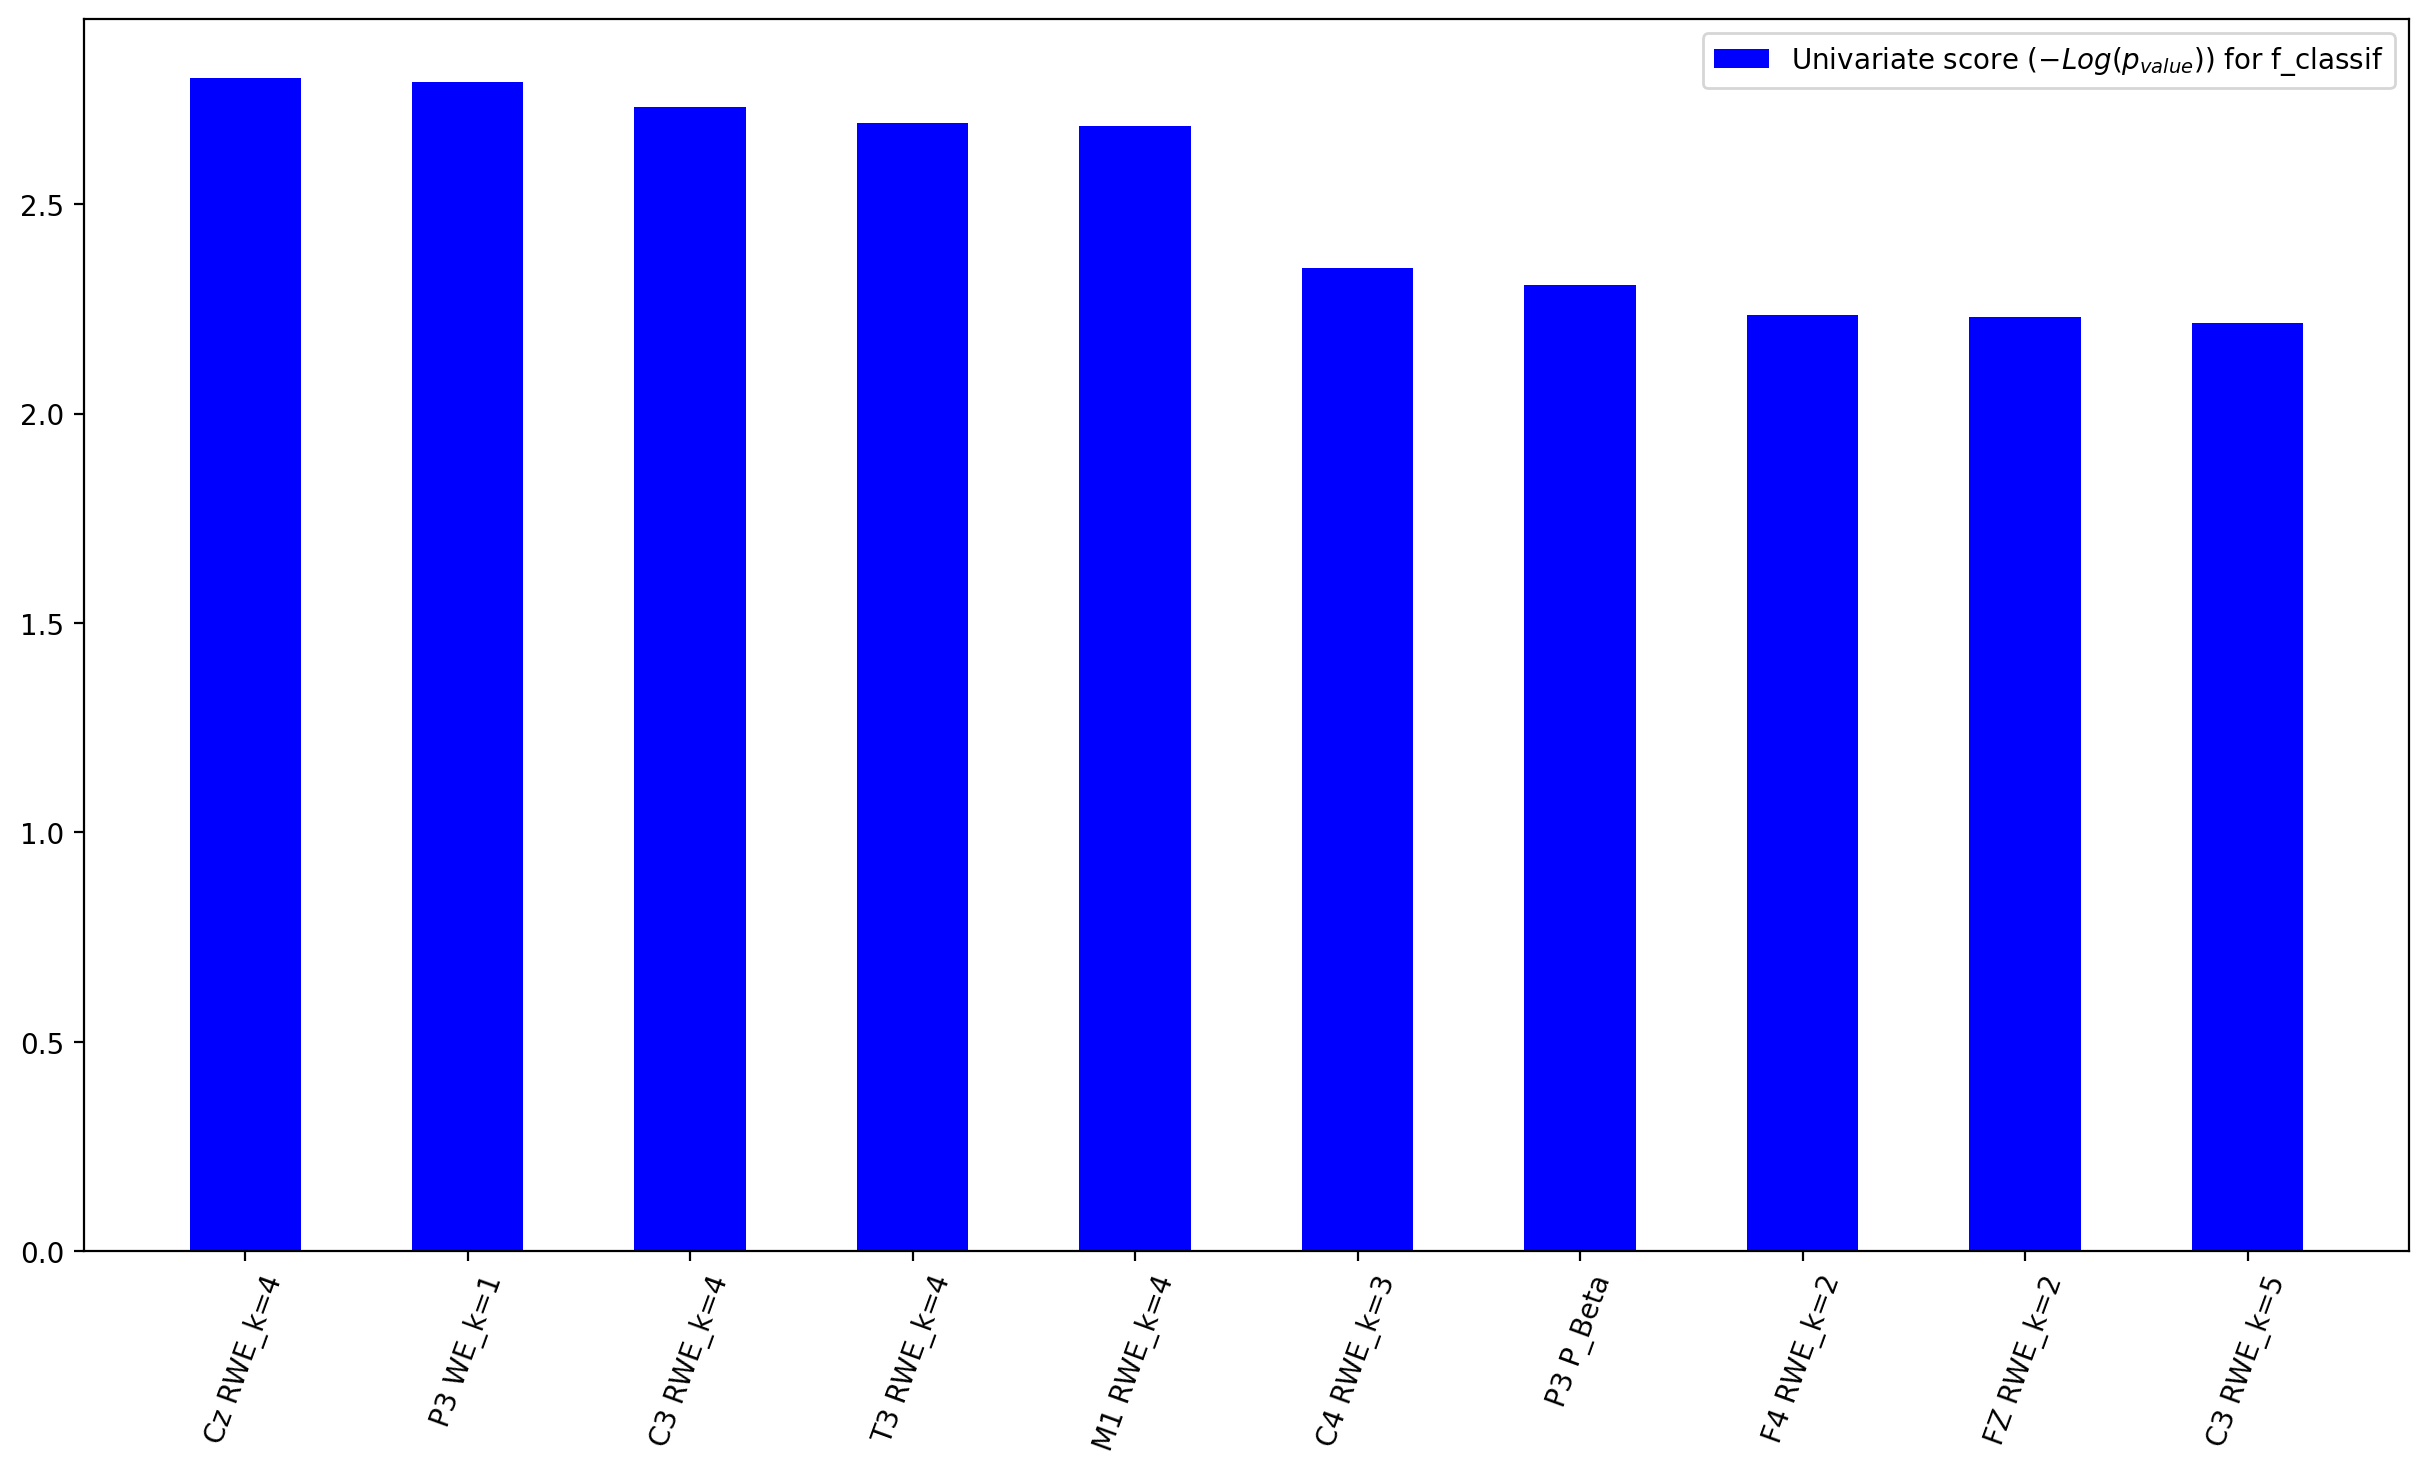

In [17]:
test = SelectKBest(score_func=f_classif, k=10)
fc = test.fit(dp, y)
print(fc)

features = fc.transform(dp)
dpt1 = dp.drop(dp.columns[0], axis=1)

X_indices = np.arange(dpt1.shape[-1])

scores = -np.log10(fc.pvalues_)

scores = np.sort(scores)[::-1]
scores1 = scores[1:]

plt.figure(figsize=(15, 8), dpi=200)
plt.bar(X_indices - 0, scores1, width=.5,
        label=r'Univariate score ($-Log(p_{value})$) for f_classif', color='blue')

plt.xticks(X_indices, dpt1.columns, rotation=70)
plt.legend()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dp, y, test_size=0.2, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36, 11) (36, 1)
Test set: (9, 11) (9, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print(X_train_sm.shape)

(36, 11)


In [ ]:
LR = LazyClassifier(verbose=0 , ignore_warnings=True, custom_metric=None)
models, predictions = LR.fit(X_train_sm, X_test, y_train_sm, y_test)
print (models)

100%|██████████| 29/29 [00:00<00:00, 36.56it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
KNeighborsClassifier               0.89               0.93     0.93      0.90   
LabelPropagation                   0.78               0.86     0.86      0.80   
LinearDiscriminantAnalysis         0.78               0.86     0.86      0.80   
ExtraTreeClassifier                0.78               0.86     0.86      0.80   
LabelSpreading                     0.78               0.86     0.86      0.80   
NuSVC                              0.67               0.79     0.79      0.69   
SVC                                0.67               0.79     0.79      0.69   
ExtraTreesClassifier               0.67               0.79     0.79      0.69   
CalibratedClassifierCV             0.56               0.71     0.71      0.58   
PassiveAggressiveClassifier        0.78               0.68     0.68      0.78   
NearestCentroid             

Text(0, 0.5, 'Accuracy')

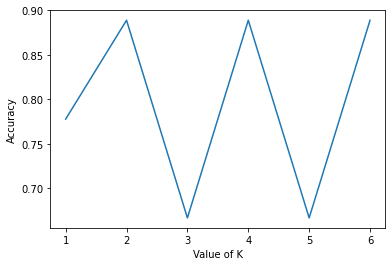

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")